# Evaluation Project 9

Rainfall Prediction - Weather Forecasting
Problem Statement:
Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


Dataset available below




Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv
https://github.com/dsrscientist/dataset3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
pd.set_option('display.max_columns',None)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.shape

(8425, 23)

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [6]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
# checking null values
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

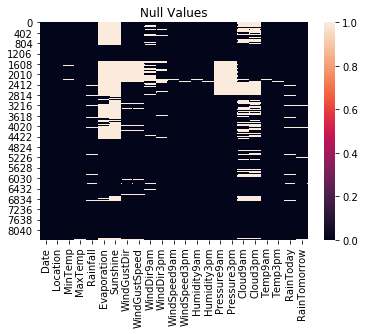

In [8]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show

#### Obs: Its clear that we have nulls here, and they need to be filled with appropriate values.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

#### Obs: There are 7 object datatypes and the remaining 16 fall under float datatype.

# Statistical Summary

In [10]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8350.0,13.193305,5.403596,-2.0,9.20,13.3,17.4,28.5
MaxTemp,8365.0,23.859976,6.136408,8.2,19.30,23.3,28.0,45.5
Rainfall,8185.0,2.805913,10.459379,0.0,0.00,0.0,1.0,371.0
Evaporation,4913.0,5.389395,5.044484,0.0,2.60,4.6,7.0,145.0
Sunshine,4431.0,7.632205,3.896235,0.0,4.75,8.7,10.7,13.9
WindGustSpeed,7434.0,40.174469,14.665721,7.0,30.00,39.0,50.0,107.0
WindSpeed9am,8349.0,13.847646,10.174579,0.0,6.00,13.0,20.0,63.0
WindSpeed3pm,8318.0,18.533662,9.766986,0.0,11.00,19.0,24.0,83.0
Humidity9am,8366.0,67.822496,16.833283,10.0,56.00,68.0,80.0,100.0
Humidity3pm,8323.0,51.249790,18.423774,6.0,39.00,51.0,63.0,99.0


#### Obs: most importantly Min value of Rainfall is 0 , whereas max value is 371.
The min value of MinTemp is -2 and max value is 28.5
The min value of MaxTemp is 8.2 and max value is 45.5 

# data analysis

In [12]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']

discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]

categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]

print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


In [13]:
## Handling missing values
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [14]:
numerical_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [15]:
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [16]:
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")

In [17]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,3.0,13.8,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,2.2,7.6,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,7.7,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,1.8,8.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,3.8,11.9,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,6.4,1.2,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,12.6,7.1,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,4.2,13.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,4.0,13.1,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Correlation

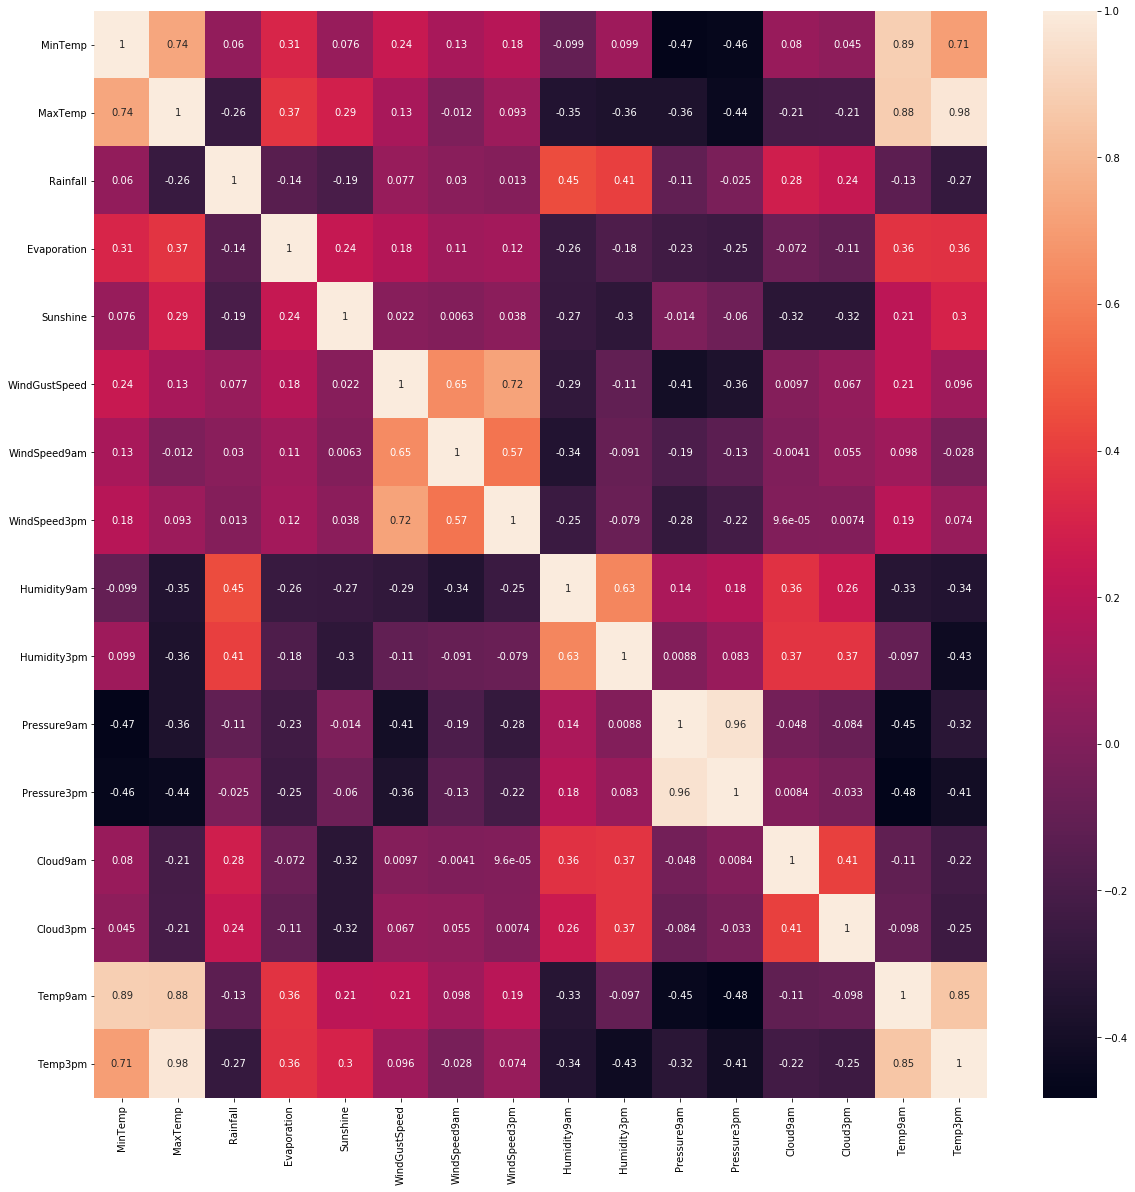

In [18]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True);

# Data Distribution

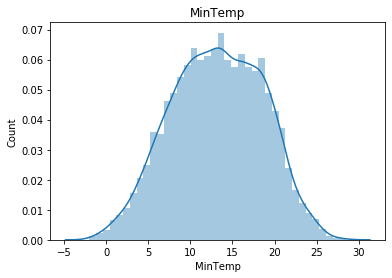

<Figure size 1080x1080 with 0 Axes>

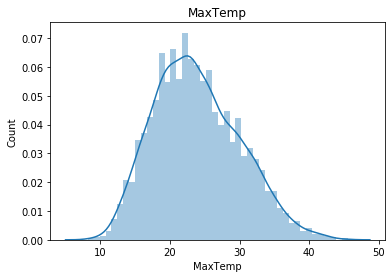

<Figure size 1080x1080 with 0 Axes>

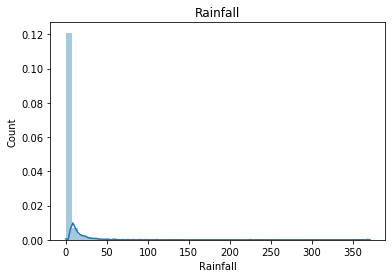

<Figure size 1080x1080 with 0 Axes>

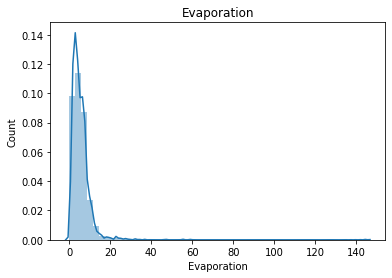

<Figure size 1080x1080 with 0 Axes>

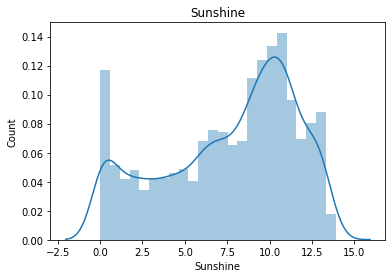

<Figure size 1080x1080 with 0 Axes>

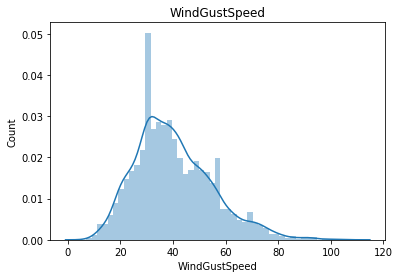

<Figure size 1080x1080 with 0 Axes>

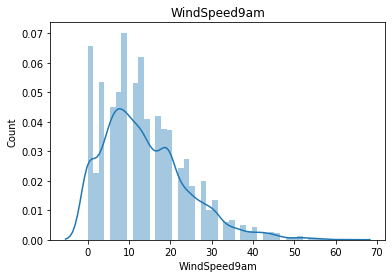

<Figure size 1080x1080 with 0 Axes>

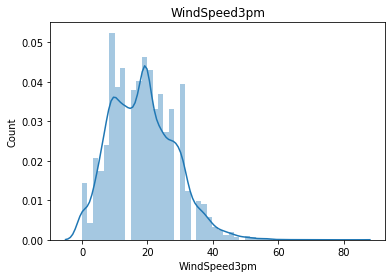

<Figure size 1080x1080 with 0 Axes>

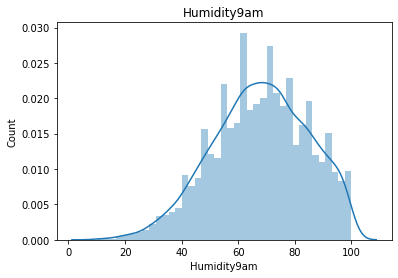

<Figure size 1080x1080 with 0 Axes>

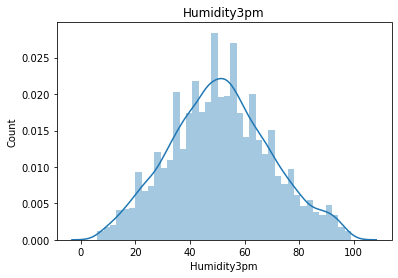

<Figure size 1080x1080 with 0 Axes>

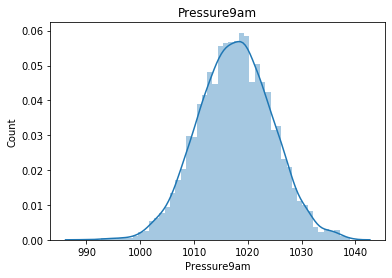

<Figure size 1080x1080 with 0 Axes>

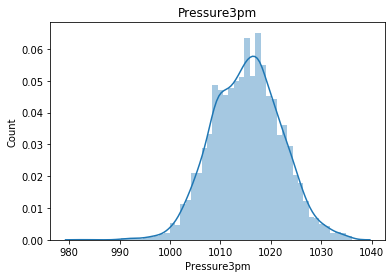

<Figure size 1080x1080 with 0 Axes>

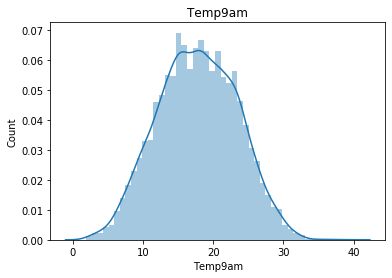

<Figure size 1080x1080 with 0 Axes>

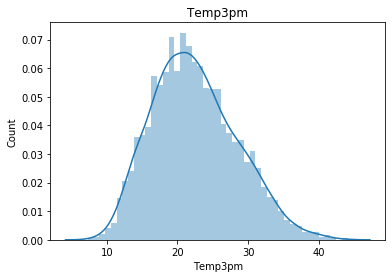

<Figure size 1080x1080 with 0 Axes>

In [19]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

#### Obs: Skewness present in data.

# Outliers

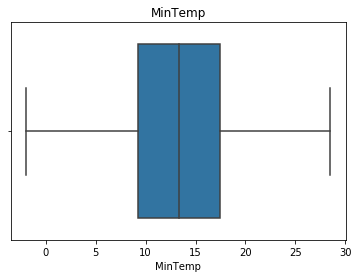

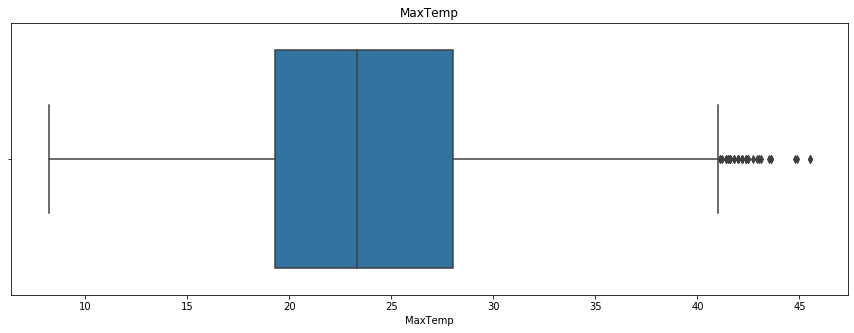

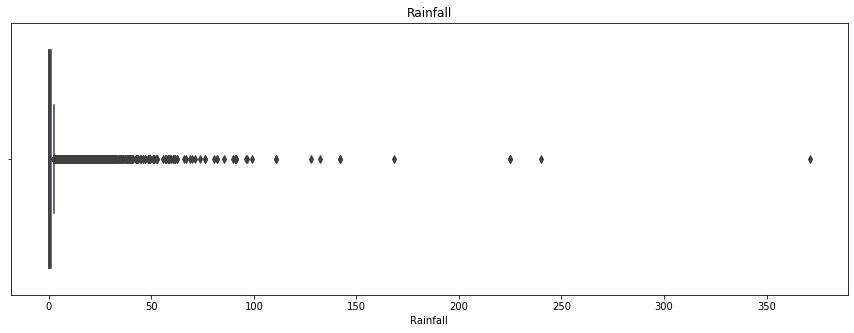

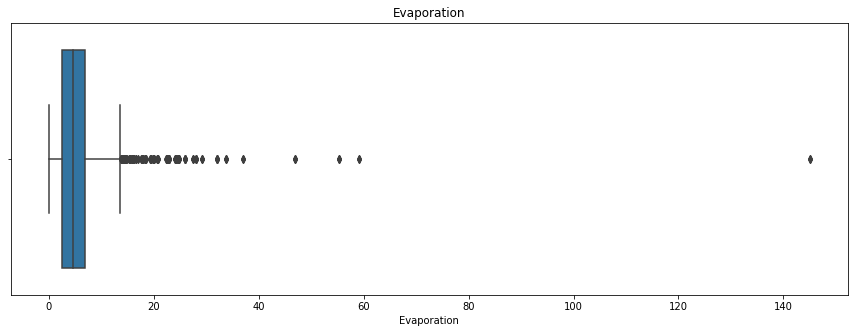

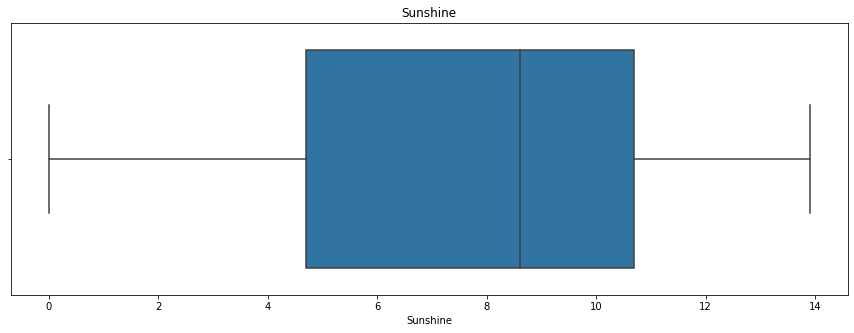

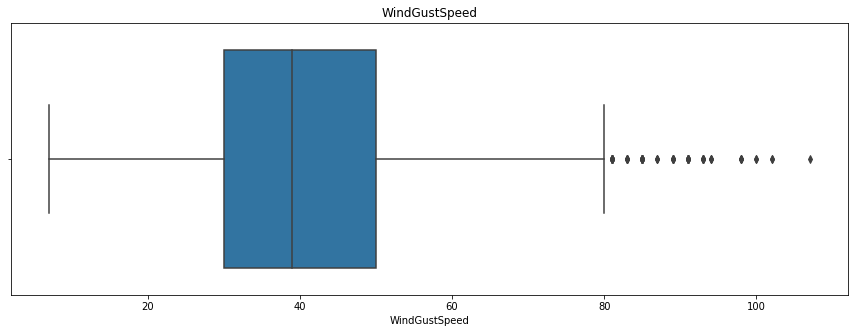

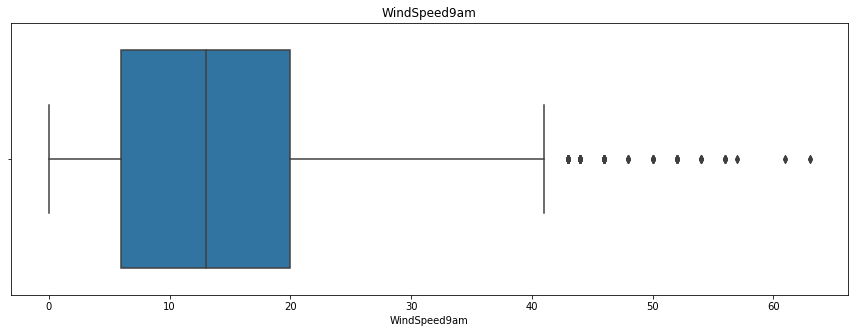

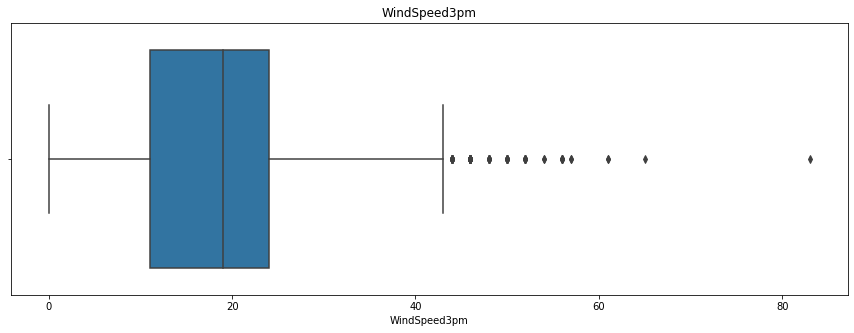

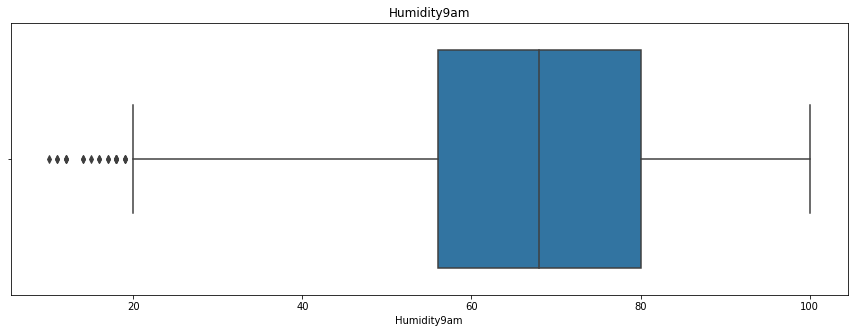

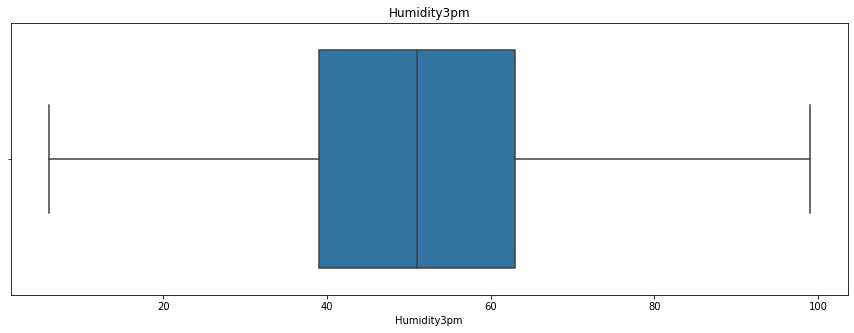

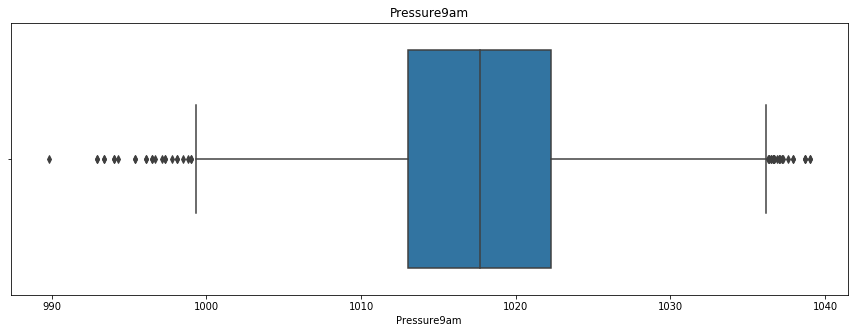

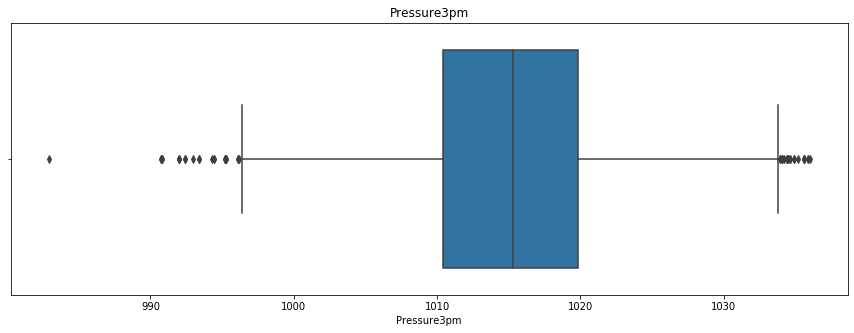

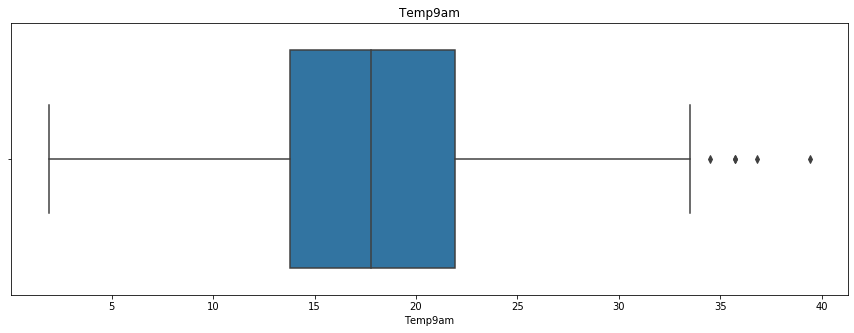

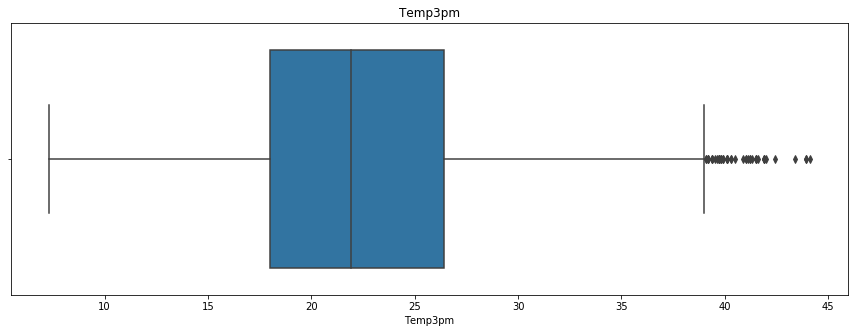

<Figure size 1080x360 with 0 Axes>

In [20]:
#for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,5));

#### Obs: Outliers present in data.

In [21]:
#filling null values in continuous features
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [22]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation       0.000000
Sunshine          0.000000
WindGustDir      11.762611
WindGustSpeed     0.000000
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       0.000000
Pressure3pm       0.000000
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           0.000000
Temp3pm           0.000000
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [23]:
discrete_feature

['Cloud9am', 'Cloud3pm']

In [24]:
# filling discreate features columns null values using MODE

def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am")
mode_nan(df,"Cloud3pm")

# Encoding:

In [25]:
from sklearn.preprocessing import OrdinalEncoder

en=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.0,1.0,13.4,22.9,0.6,3.0,13.8,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0.0,0.0
1,1.0,1.0,7.4,25.1,0.0,2.2,7.6,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,0.0,0.0
2,2.0,1.0,12.9,25.7,0.0,4.6,7.7,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0.0,0.0
3,3.0,1.0,9.2,28.0,0.0,1.8,8.0,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,0.0,0.0
4,4.0,1.0,17.5,32.3,1.0,3.8,11.9,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


In [26]:
# checking null values again after encoding
df.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      991
WindGustSpeed      0
WindDir9am       829
WindDir3pm       308
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        240
RainTomorrow     239
dtype: int64

In [27]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Float64Index([2676.0, 2763.0, 2765.0, 1541.0, 1576.0, 2242.0,  294.0,  295.0,
              2565.0, 2564.0,
              ...
              2810.0, 2811.0, 2812.0, 2813.0, 2819.0, 2820.0, 2821.0, 2823.0,
              2824.0, 2825.0],
             dtype='float64', name='Date', length=3004)
Location Float64Index([3.0, 5.0, 11.0, 10.0, 6.0, 7.0, 2.0, 0.0, 1.0, 8.0, 4.0, 9.0], dtype='float64', name='Location')
WindGustDir Float64Index([ 6.0, 11.0,  3.0, 15.0,  7.0, 12.0,  8.0,  5.0, 14.0, 10.0,  4.0,
               9.0,  2.0, 13.0,  1.0,  0.0],
             dtype='float64', name='WindGustDir')
WindDir9am Float64Index([ 3.0, 14.0, 12.0, 13.0,  5.0,  6.0, 11.0,  2.0, 15.0,  8.0,  7.0,
               4.0, 10.0,  9.0,  1.0,  0.0],
             dtype='float64', name='WindDir9am')
WindDir3pm Float64Index([11.0,  6.0,  3.0,  7.0,  8.0, 15.0, 12.0,  5.0,  9.0,  1.0, 13.0,
              14.0,  0.0, 10.0,  4.0,  2.0],
             dtype='float64', name='WindDir3pm')
RainToday Float64Index([1.0

In [28]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [29]:
df.isnull().sum()*100/len(df)

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      0.000000
WindGustSpeed    0.000000
WindDir9am       0.000000
WindDir3pm       0.000000
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        2.848665
RainTomorrow     2.836795
dtype: float64

In [30]:
df["RainToday"].value_counts()

0.0    6195
1.0    1990
Name: RainToday, dtype: int64

In [31]:
df["RainTomorrow"].value_counts()

0.0    6195
1.0    1991
Name: RainTomorrow, dtype: int64

In [32]:
# We replace the RainToday and RainTomorrow NaN values with mode.

df["RainToday"] = df["RainToday"].fillna(df["RainToday"].mode()[0])
df["RainTomorrow"] = df["RainTomorrow"].fillna(df["RainTomorrow"].mode()[0])

In [33]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

#### Obs: All the NaN values are filled. Good to proceed.

#### Checking corr mat again after encoding the DataFrame:

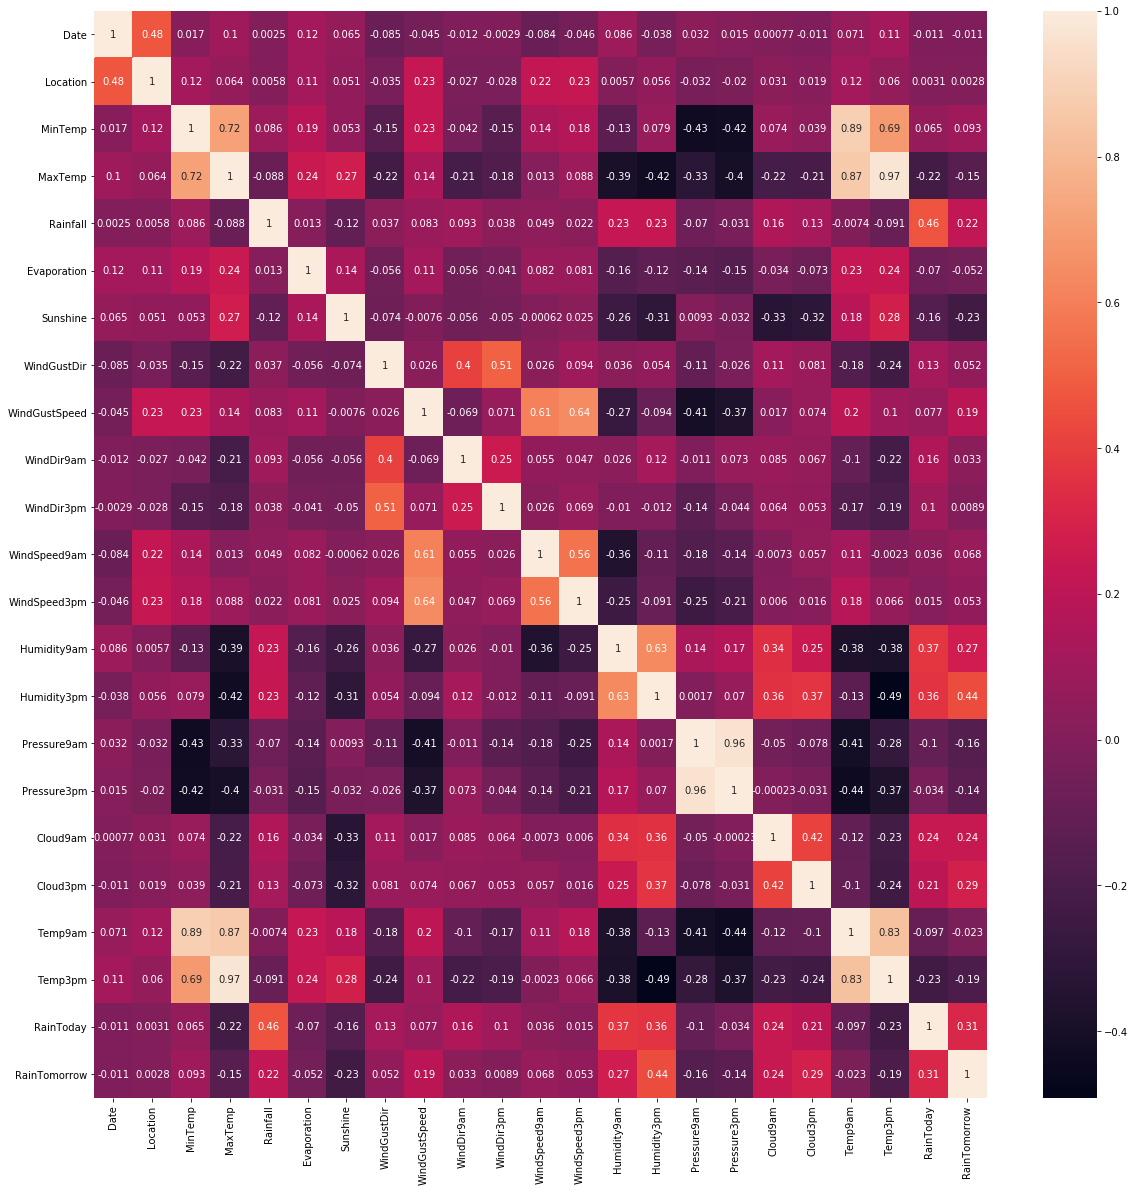

In [35]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True);

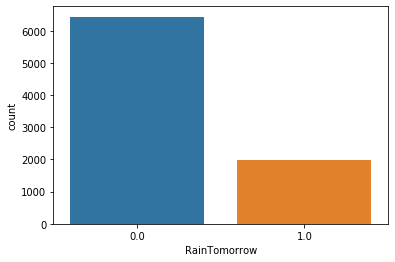

In [36]:
sns.countplot(df["RainTomorrow"]);

# Checking the Outliers:

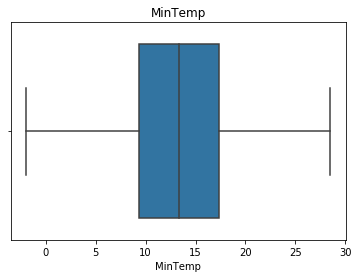

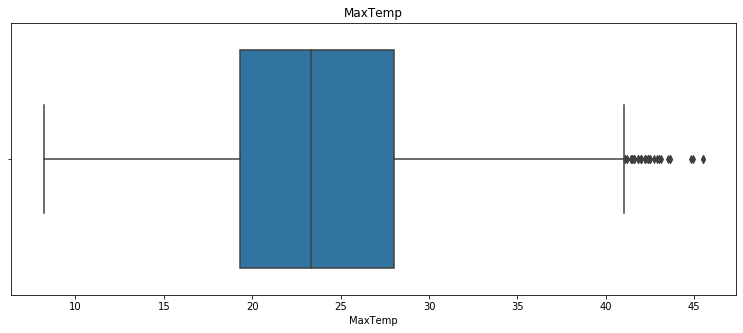

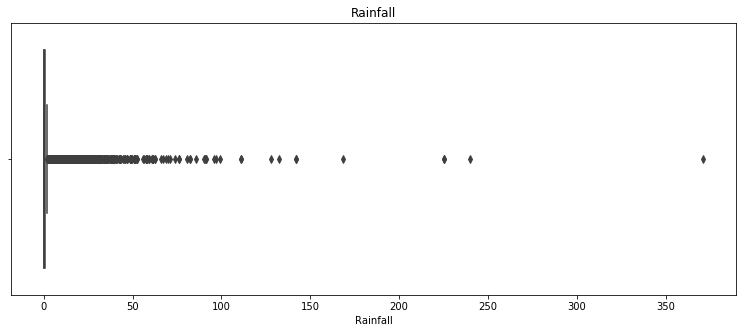

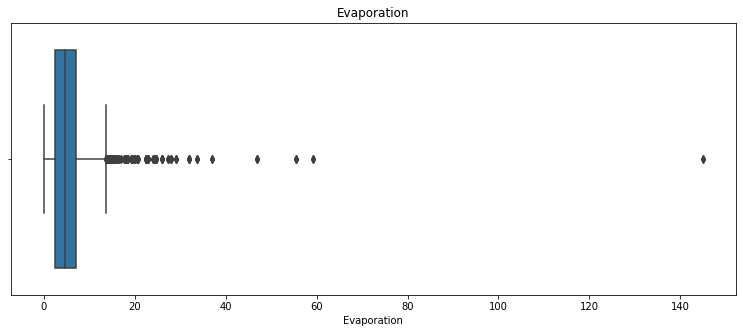

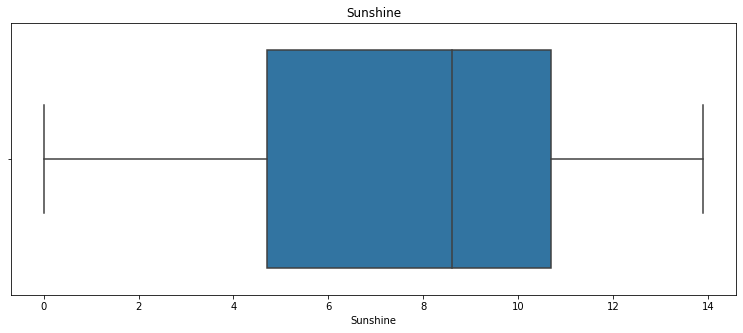

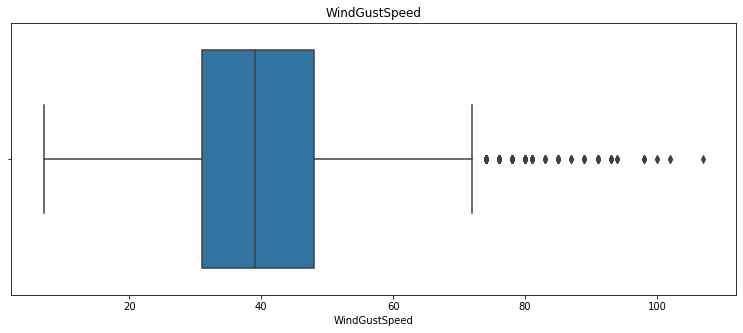

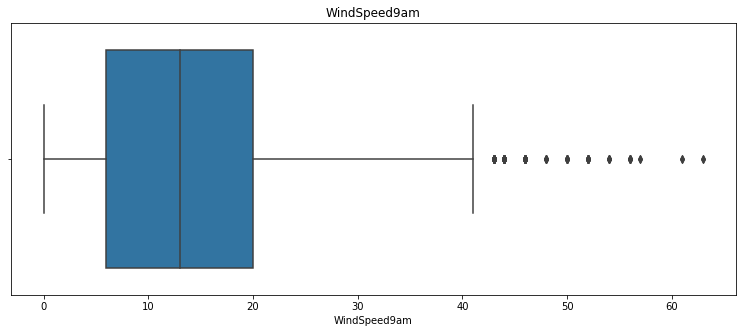

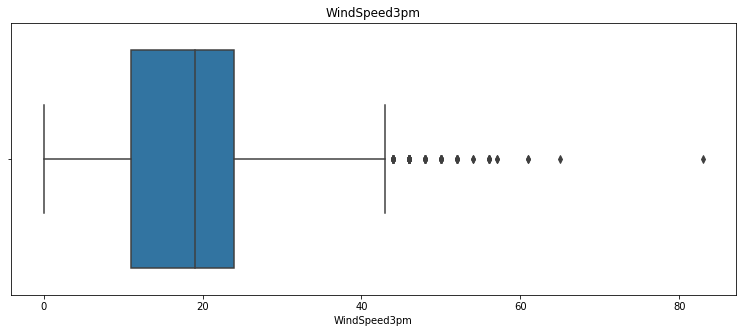

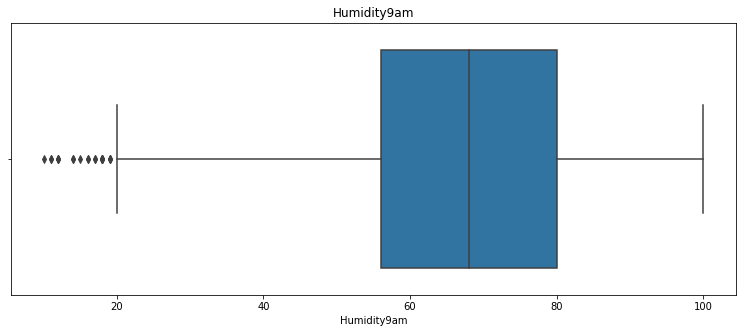

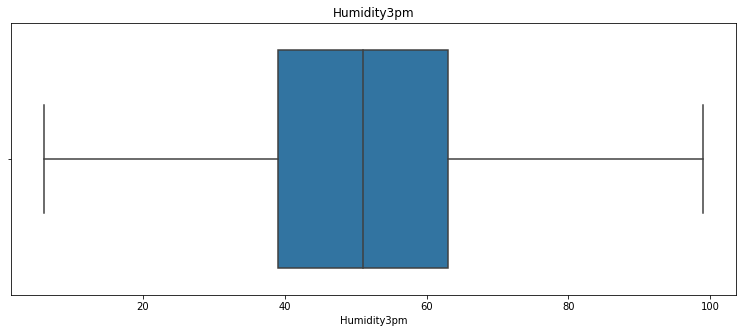

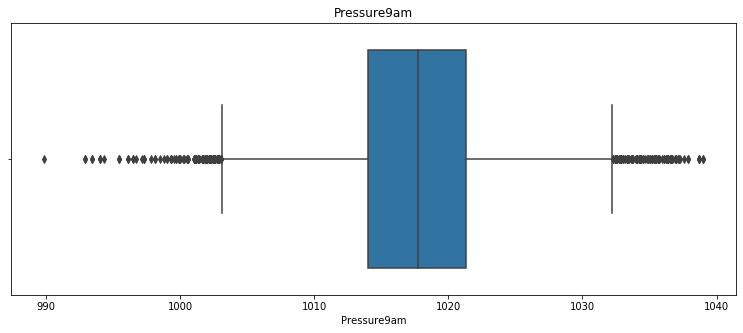

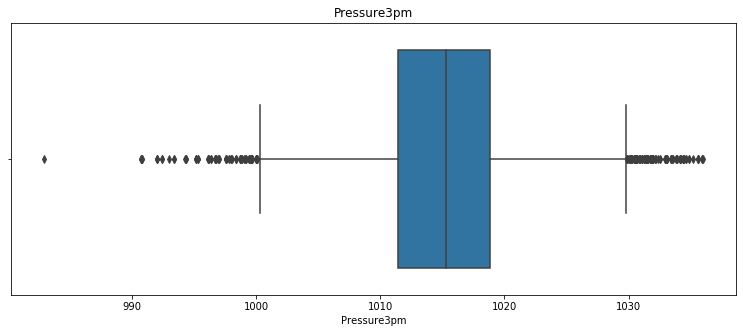

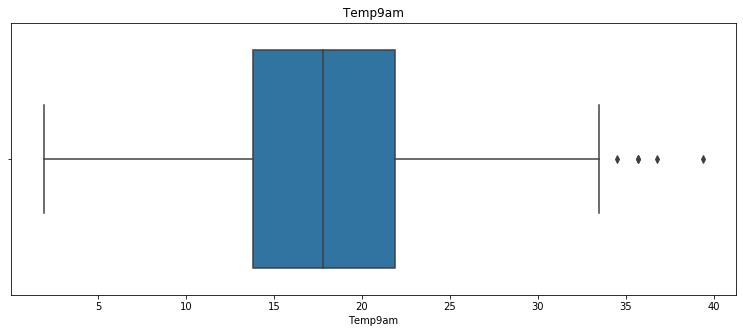

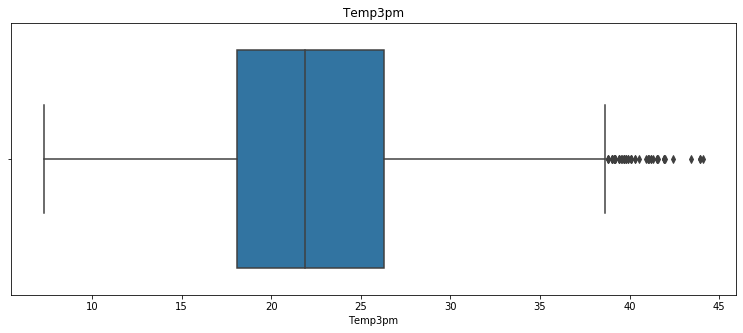

<Figure size 936x360 with 0 Axes>

In [37]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(13,5));

In [38]:
for feature in continuous_feature:
    print(feature)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Temp9am
Temp3pm


# Outliers IQR

In [39]:
IQR=df.MinTemp.quantile(0.75)-df.MinTemp.quantile(0.25)
lower_bridge=df.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-2.6999999999999993 29.3


In [40]:
df.loc[df['MinTemp']>=29.3,'MinTemp']=29.3
df.loc[df['MinTemp']<=-2.69,'MinTemp']=-2.69

In [41]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_bridge=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

6.250000000000002 41.05


In [42]:
df.loc[df['MaxTemp']>=41.05,'MaxTemp']=41.05
df.loc[df['MaxTemp']<=6.25,'MaxTemp']=6.25

In [43]:
IQR=df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
lower_bridge=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.2000000000000002 2.0


In [44]:
df.loc[df['Rainfall']>=2.0,'Rainfall']=2.0
df.loc[df['Rainfall']<=-1.2,'Rainfall']=-1.2

In [45]:
IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
lower_bridge=df.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-4.0 13.600000000000001


In [46]:
df.loc[df['Evaporation']>=13.6,'Evaporation']=13.6
df.loc[df['Evaporation']<=-4.0,'Evaporation']=-4.0

In [47]:
IQR=df.WindGustSpeed.quantile(0.75)-df.WindGustSpeed.quantile(0.25)
lower_bridge=df.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

5.5 73.5


In [48]:
df.loc[df['WindGustSpeed']>=73.5,'WindGustSpeed']=73.5
df.loc[df['WindGustSpeed']<=5.5,'WindGustSpeed']=5.5

In [49]:
IQR=df.WindSpeed9am.quantile(0.75)-df.WindSpeed9am.quantile(0.25)
lower_bridge=df.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-15.0 41.0


In [50]:
df.loc[df['WindSpeed9am']>=41,'WindSpeed9am']=41
df.loc[df['WindSpeed9am']<=-15,'WindSpeed9am']=-15

In [51]:
IQR=df.WindSpeed3pm.quantile(0.75)-df.WindSpeed3pm.quantile(0.25)
lower_bridge=df.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-8.5 43.5


In [52]:
df.loc[df['WindSpeed3pm']>43.5,'WindSpeed3pm']=43.5
df.loc[df['WindSpeed3pm']<=-8.5,'WindSpeed3pm']=-8.5

In [53]:
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_bridge=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

20.0 116.0


In [54]:
df.loc[df['Humidity9am']>=116,'Humidity9am']=116
df.loc[df['Humidity9am']<=20,'Humidity9am']=20

In [55]:
IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_bridge=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1003.0500000000001 1032.25


In [56]:
df.loc[df['Pressure9am']>=1032.25,'Pressure9am']=1032.25
df.loc[df['Pressure9am']<=1003.05,'Pressure9am']=1003.05

In [57]:
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1000.3 1029.8999999999999


In [58]:
df.loc[df['Pressure3pm']>=1029.89,'Pressure3pm']=1029.89
df.loc[df['Pressure3pm']<=1000.3,'Pressure3pm']=1000.3

In [59]:
IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_bridge=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1.650000000000004 34.05


In [60]:
df.loc[df['Temp9am']>=34.05,'Temp9am']=34.05
df.loc[df['Temp9am']<=1.65,'Temp9am']=1.65

In [61]:
IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_bridge=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

5.8000000000000025 38.6


In [62]:
df.loc[df['Temp3pm']>=38.6,'Temp3pm']=38.6
df.loc[df['Temp3pm']<=5.8,'Temp3pm']=5.8

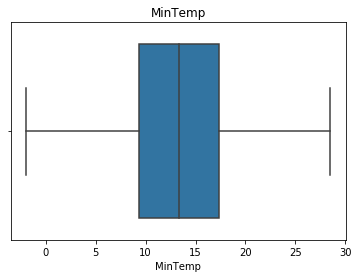

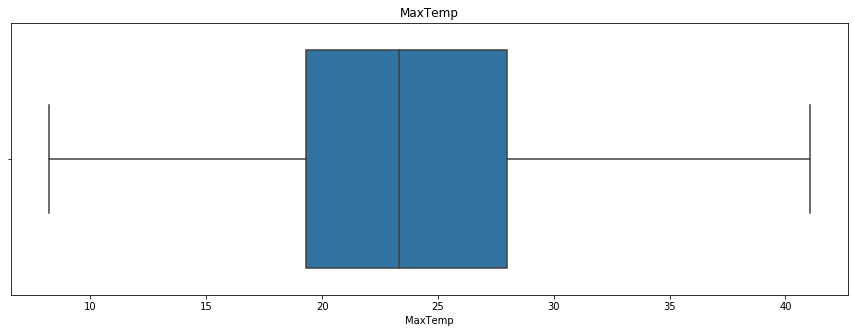

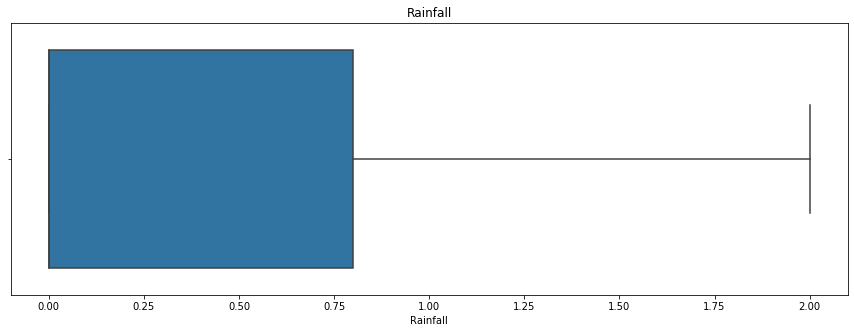

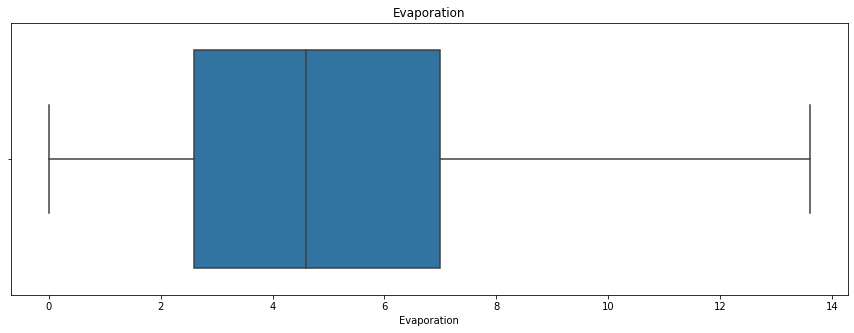

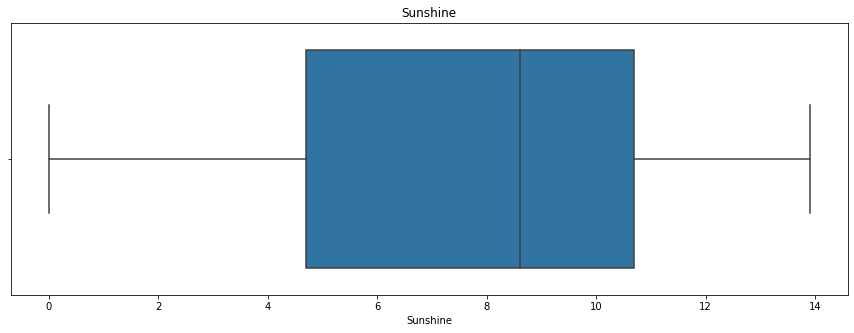

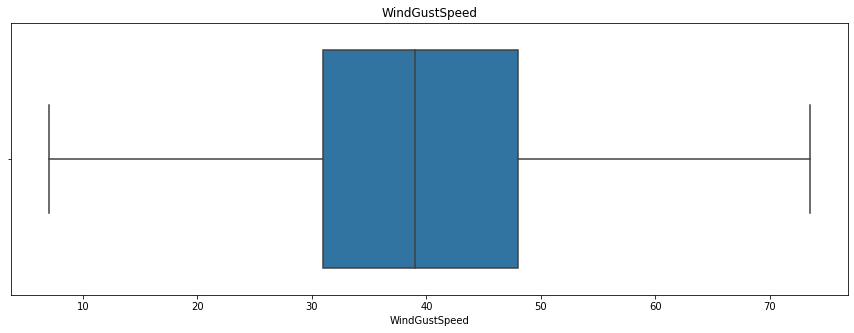

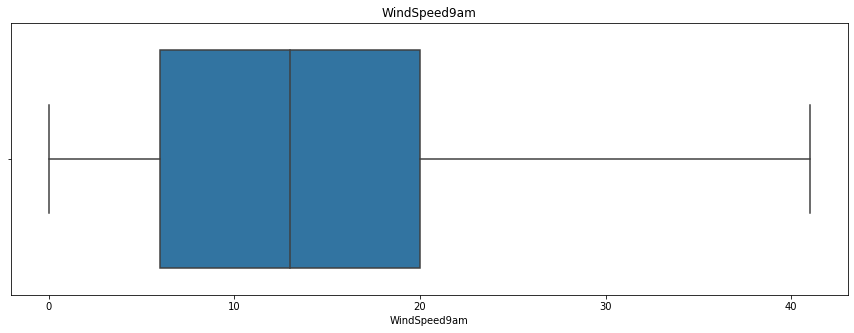

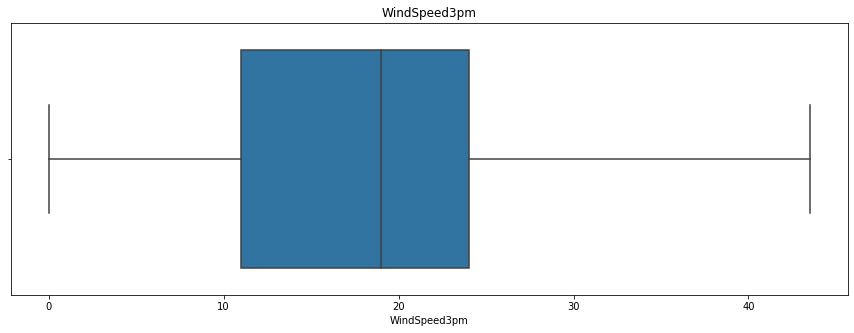

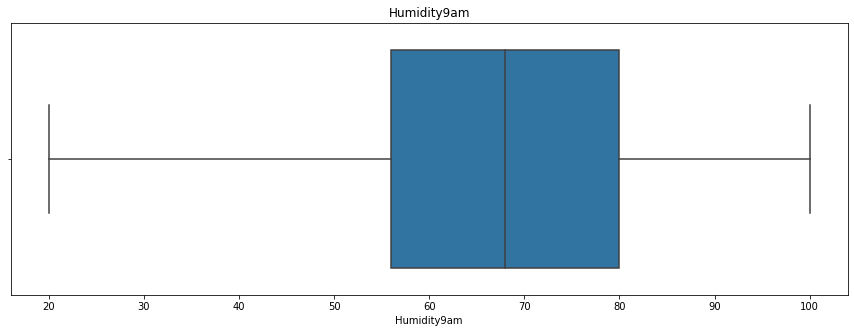

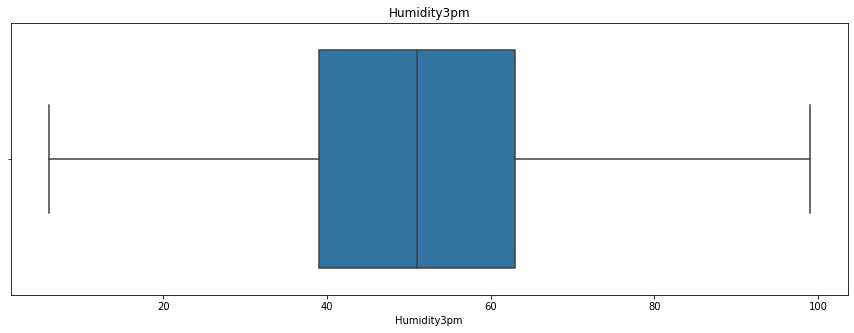

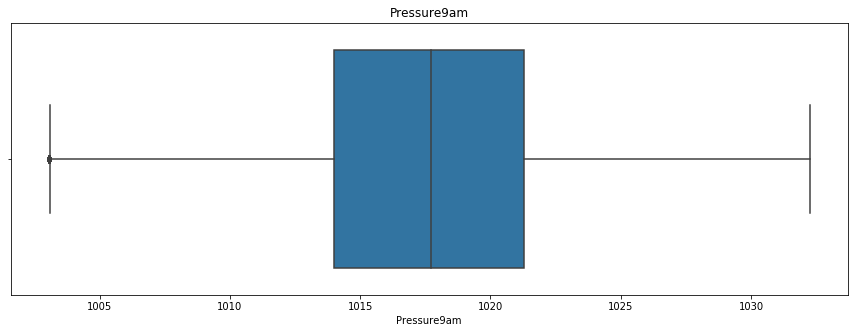

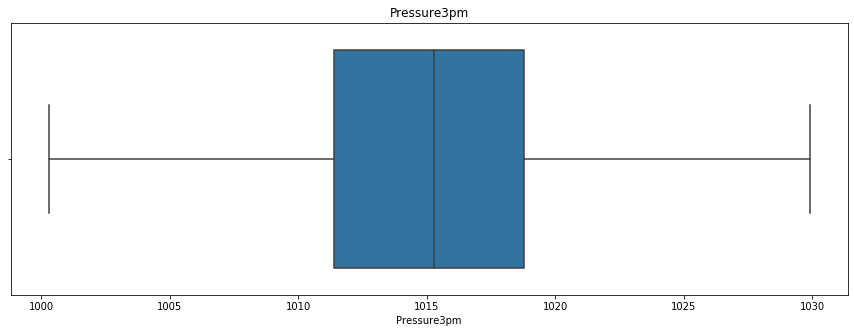

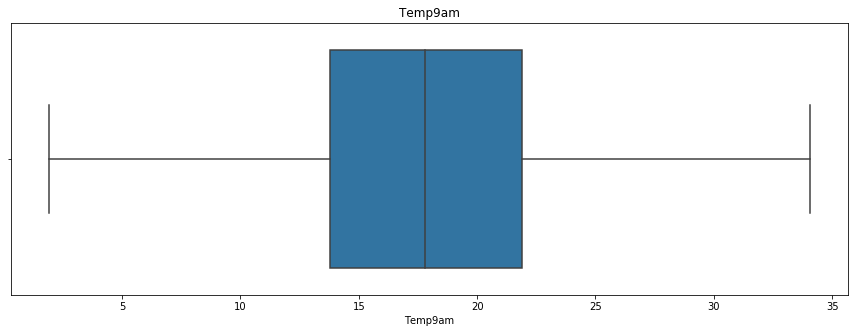

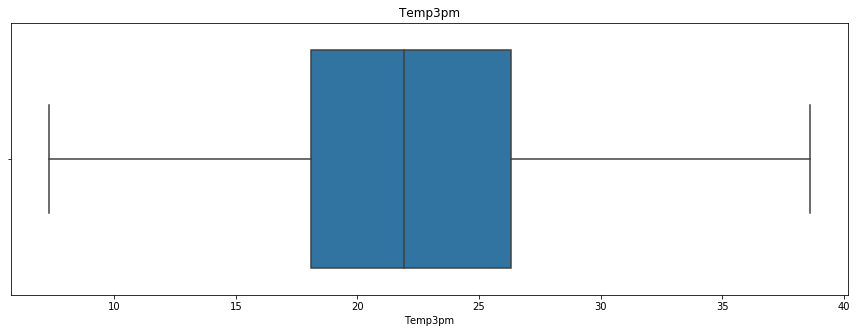

<Figure size 1080x360 with 0 Axes>

In [63]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,5));

#### Obs: Outliers has been removed.

In [64]:
def qq_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show();

MinTemp


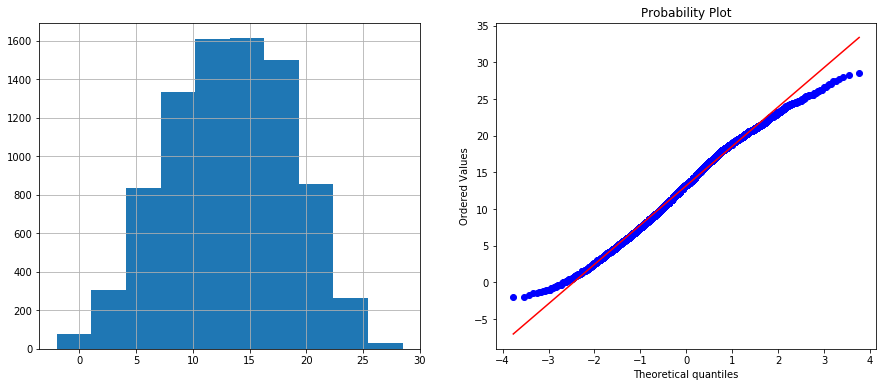

MaxTemp


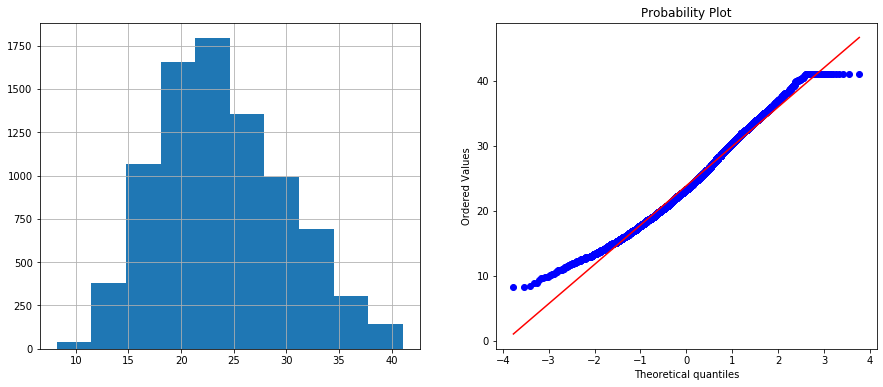

Rainfall


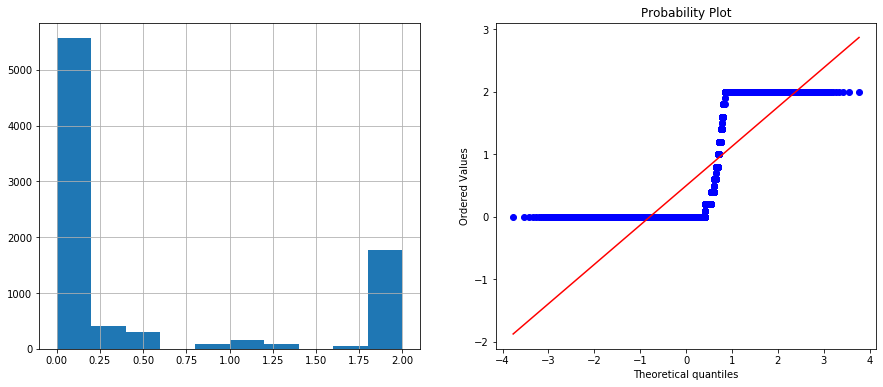

Evaporation


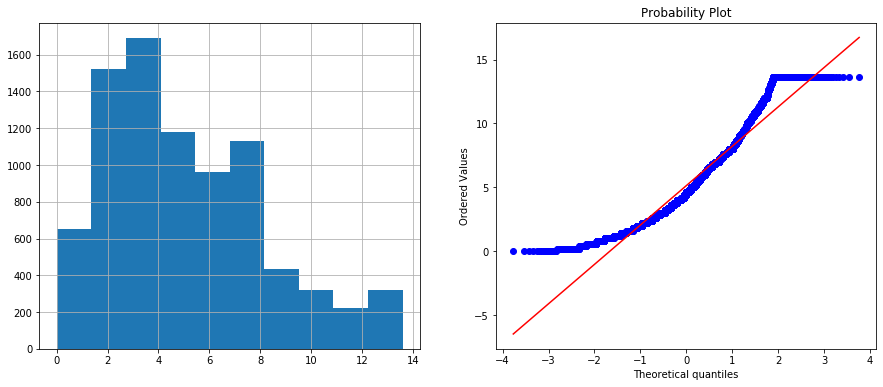

Sunshine


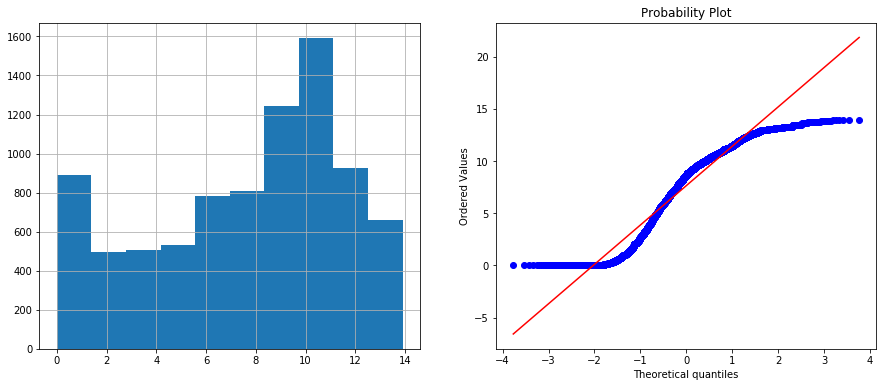

WindGustSpeed


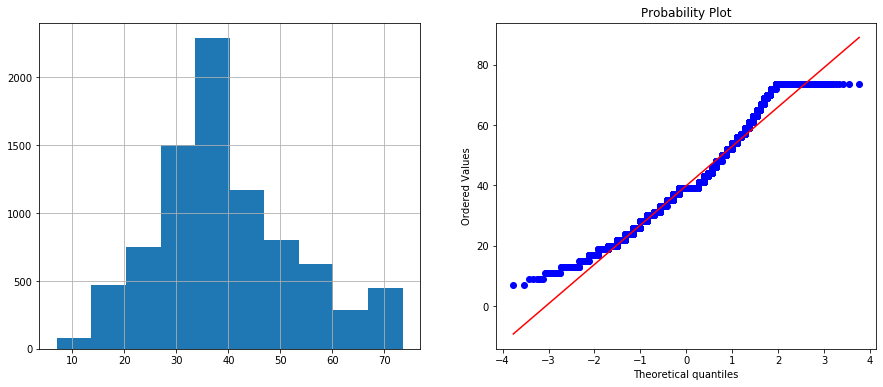

WindSpeed9am


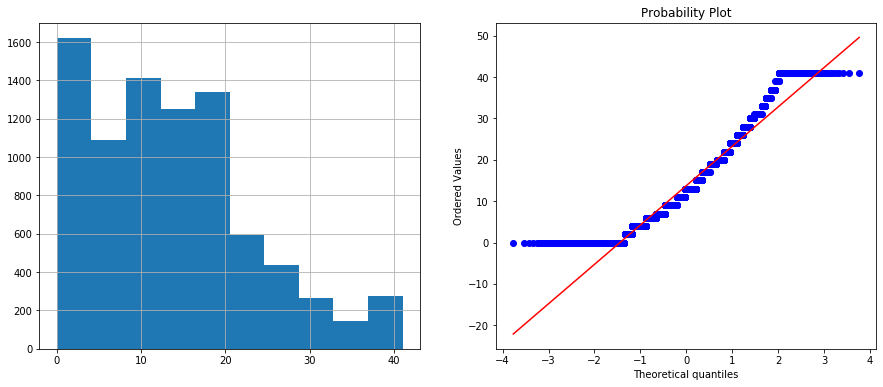

WindSpeed3pm


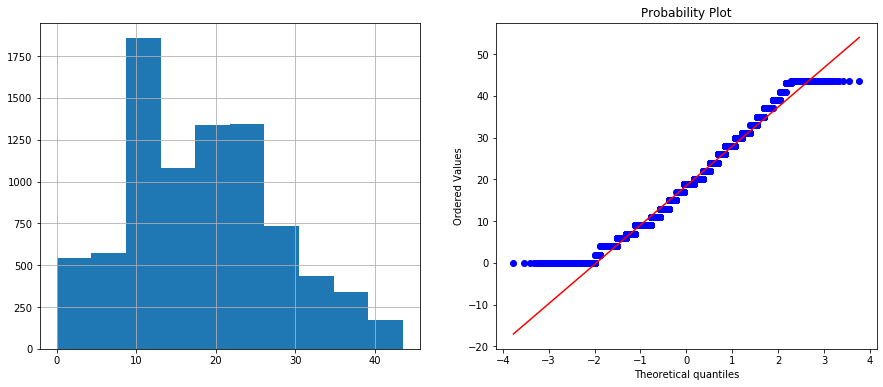

Humidity9am


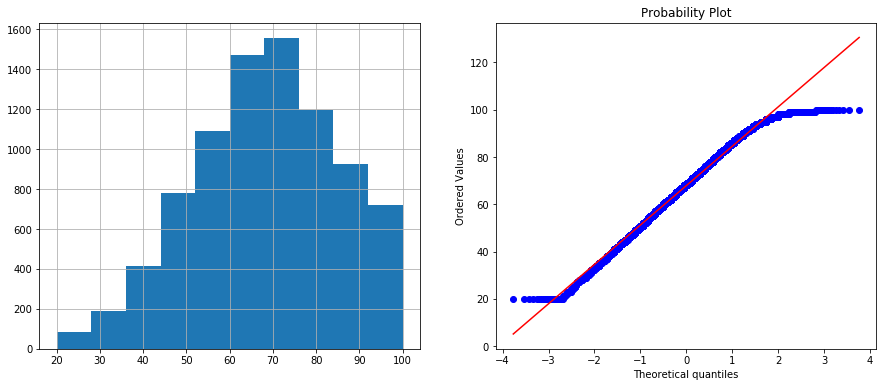

Humidity3pm


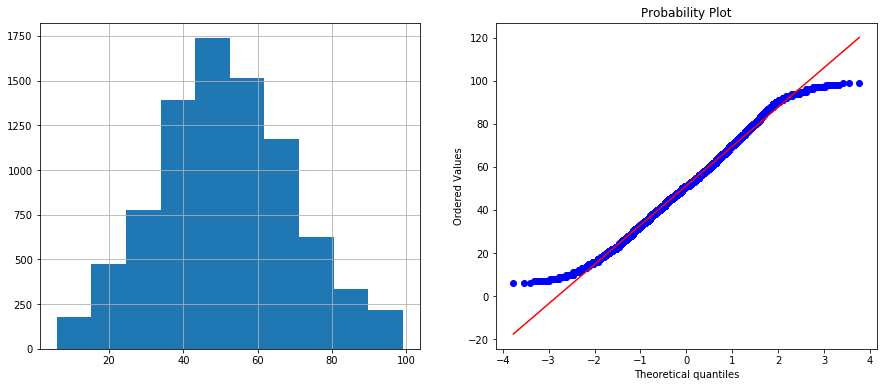

Pressure9am


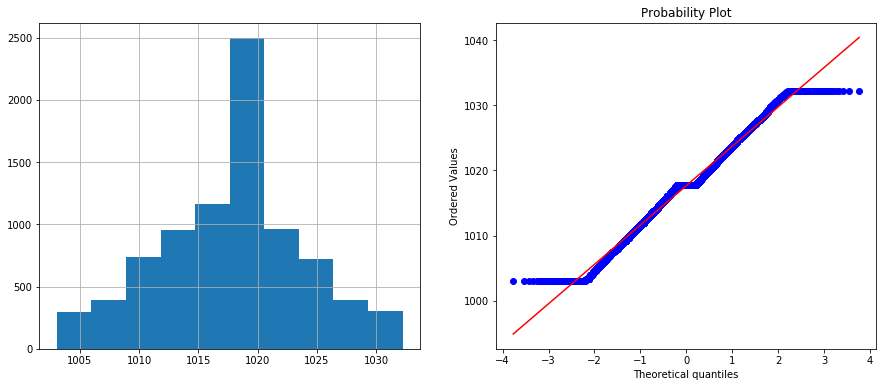

Pressure3pm


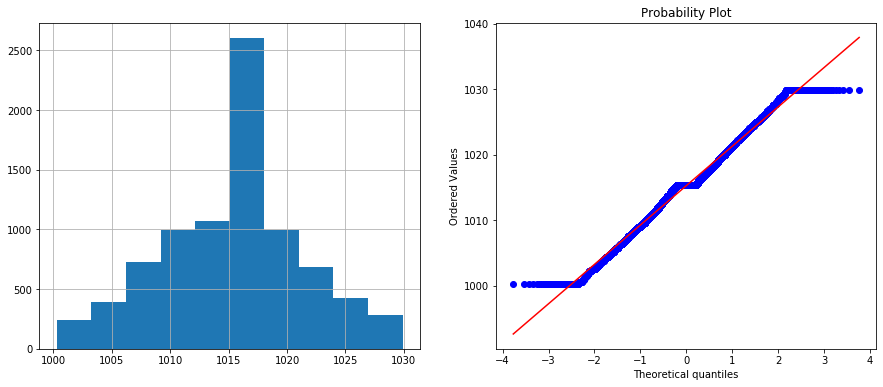

Temp9am


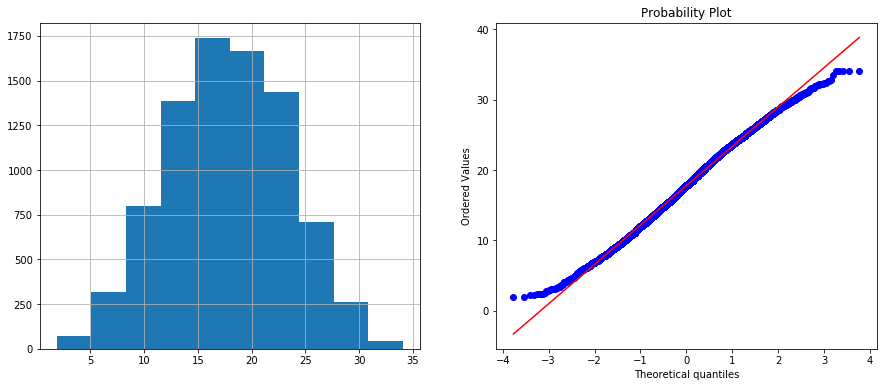

Temp3pm


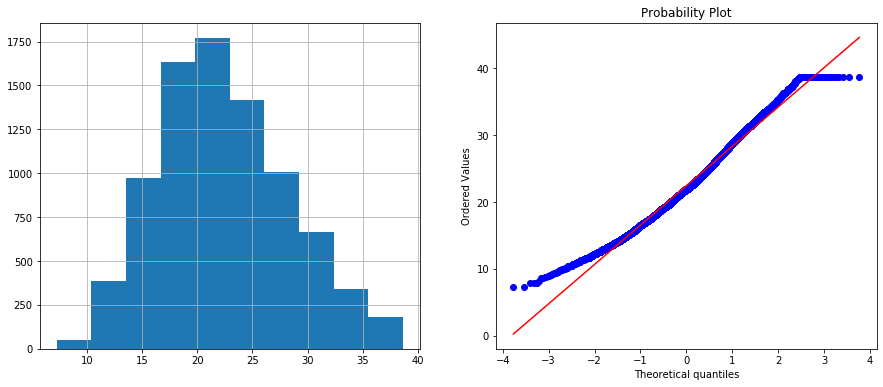

In [65]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show();

In [66]:
df.to_csv("preprocessed_1.csv", index=False)

In [67]:
x = df.drop(["RainTomorrow", "Date"], axis=1)
y = df["RainTomorrow"]

In [68]:
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1.0,13.4,22.9,0.6,3.0,13.8,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0.0
1,1.0,7.4,25.1,0.0,2.2,7.6,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,0.0
2,1.0,12.9,25.7,0.0,4.6,7.7,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0.0
3,1.0,9.2,28.0,0.0,1.8,8.0,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,0.0
4,1.0,17.5,32.3,1.0,3.8,11.9,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9.0,2.8,23.4,0.0,6.4,1.2,0.0,31.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,0.0
8421,9.0,3.6,25.3,0.0,12.6,7.1,6.0,22.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,0.0
8422,9.0,5.4,26.9,0.0,4.2,13.0,3.0,37.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,0.0
8423,9.0,7.8,27.0,0.0,4.0,13.1,9.0,28.0,10.0,3.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0.0


# Standard Scaling

In [69]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,-1.515776,0.038248,-0.155803,0.125447,-0.669849,1.582770,1.229643,0.312652,1.249535,1.397222,0.640500,0.580729,0.189071,-1.597239,-1.636473,-1.348283,1.188369,1.283648,-0.153631,-0.105731,-0.556099
1,-1.515776,-1.077164,0.205130,-0.613033,-0.922133,-0.007275,1.442303,0.312652,-0.276260,1.622961,-0.994933,0.370388,-1.424043,-1.433401,-1.159614,-1.232413,-1.244683,-0.182260,-0.100092,0.317227,-0.556099
2,-1.515776,-0.054703,0.303567,-0.613033,-0.165280,0.018371,1.654964,0.463640,1.249535,1.622961,0.538286,0.791070,-1.782513,-1.160339,-1.652916,-1.083436,-0.897104,-0.915214,0.578063,0.131126,-0.556099
3,-1.515776,-0.742540,0.680906,-0.613033,-1.048275,0.095308,-0.684299,-1.197226,0.377652,-1.763120,-0.279431,-0.996830,-1.364298,-1.924914,-0.008577,-0.404767,1.188369,0.917171,0.060523,0.689430,-0.556099
4,-1.515776,0.800447,1.386367,0.617766,-0.417564,1.095498,1.229643,0.086171,-1.366114,-0.182949,-0.688290,0.160047,0.846265,-0.996501,-1.126728,-1.530365,0.840790,1.283648,0.006985,1.230817,-0.556099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.013895,-1.932313,-0.073773,-0.613033,0.402360,-1.648612,-1.534940,-0.668768,0.377652,-1.537381,-0.075002,-0.786489,-1.005829,-1.488014,1.142460,0.836702,1.188369,-0.182260,-1.367171,-0.004221,-0.556099
8421,1.013895,-1.783591,0.237942,-0.613033,2.357564,-0.135505,-0.258979,-1.348213,0.377652,-1.085904,-0.075002,-0.996830,-0.707104,-1.651851,0.961583,0.638067,-1.244683,-1.281691,-1.224402,0.351064,-0.556099
8422,1.013895,-1.448968,0.500439,-0.613033,-0.291422,1.377603,-0.896959,-0.215805,0.377652,1.397222,-0.483860,-0.996830,-0.886339,-1.488014,0.550498,0.257350,0.493211,0.184217,-0.938863,0.621757,-0.556099
8423,1.013895,-1.002803,0.516846,-0.613033,-0.354493,1.403248,0.379002,-0.895250,0.595623,-1.085904,-0.075002,-1.207172,-1.005829,-1.488014,0.287404,0.207691,-0.549525,-0.915214,-0.474862,0.604839,-0.556099


# Feature Importance

In [70]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier()

In [71]:
print(extra.feature_importances_)

[0.03635571 0.0399793  0.04046245 0.0581391  0.0366393  0.04927517
 0.03633474 0.05610075 0.03636887 0.03853812 0.03957068 0.04047265
 0.05349995 0.12978919 0.04173954 0.0452745  0.04168389 0.05909865
 0.03914738 0.04446279 0.03706725]


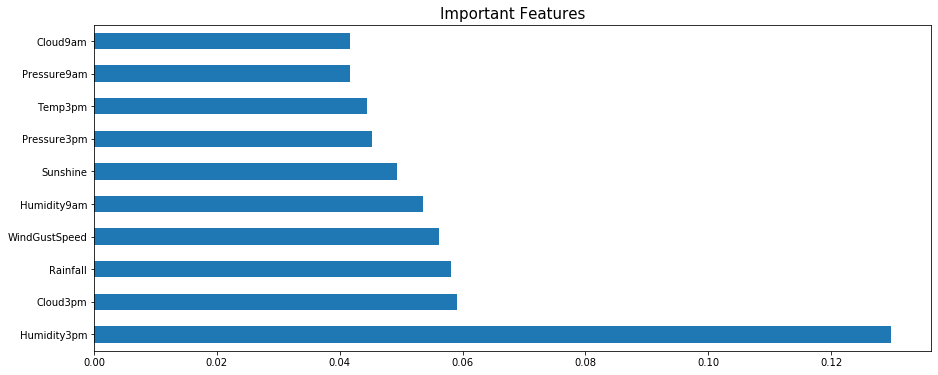

In [72]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

#### Obs: Humidity3pm is the most important feature for our prediction.

# Model Building

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc,plot_roc_curve
from imblearn.combine import SMOTEENN

In [74]:
#over sampling of our Data
sm=SMOTEENN()
x_resample,y_resample=sm.fit_resample(x,y)
x_resample

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,-1.515776,-1.077164,0.205130,-0.613033,-0.922133,-0.007275,1.442303,0.312652,-0.276260,1.622961,-0.994933,0.370388,-1.424043,-1.433401,-1.159614,-1.232413,-1.244683,-0.182260,-0.100092,0.317227,-0.556099
1,-1.515776,-0.054703,0.303567,-0.613033,-0.165280,0.018371,1.654964,0.463640,1.249535,1.622961,0.538286,0.791070,-1.782513,-1.160339,-1.652916,-1.083436,-0.897104,-0.915214,0.578063,0.131126,-0.556099
2,-1.515776,-0.742540,0.680906,-0.613033,-1.048275,0.095308,-0.684299,-1.197226,0.377652,-1.763120,-0.279431,-0.996830,-1.364298,-1.924914,-0.008577,-0.404767,1.188369,0.917171,0.060523,0.689430,-0.556099
3,-1.515776,0.261331,0.959809,-0.366873,1.537640,0.377413,1.442303,1.218579,1.249535,1.171484,0.538286,0.580729,-0.766849,-1.542626,-1.389822,-1.629683,-1.592262,-1.281691,0.506678,1.095470,-0.556099
4,-1.515776,0.205560,0.188724,-0.613033,-1.174418,0.197892,1.229643,0.765616,1.031564,1.171484,0.640500,0.580729,-1.125319,-1.761076,-1.324048,-1.166201,-1.244683,0.550694,0.060523,0.367982,-0.556099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10248,0.697686,-0.268458,-0.581107,1.848565,-0.497817,-0.690340,1.522845,2.047255,0.618797,-0.268444,0.496518,1.299455,0.872464,0.214044,-1.295641,-1.267992,0.408914,0.550694,-0.514585,-0.525597,1.798240
10249,-0.872294,-0.518081,-1.137230,-0.613033,-0.933423,-0.390754,-0.304487,2.197358,-0.930172,-0.545711,0.925271,1.110262,-0.453248,0.043047,-1.231341,-2.194286,0.629811,0.629119,-0.976429,-1.021757,-0.556099
10250,-1.045294,0.785521,-0.619943,1.848565,-1.077519,-1.943229,0.908076,-1.467857,1.137909,1.391753,-0.845327,-1.163505,1.469968,2.081826,-0.105536,-0.199151,1.188369,1.095970,0.107143,-0.704841,1.798240
10251,-0.250940,0.042615,-0.109891,-0.613033,-0.730816,1.005425,1.268953,1.294073,1.665330,1.150620,0.612159,1.507824,-0.338586,-1.203946,-0.748107,-0.388214,0.872915,0.184217,-0.291911,-0.095350,-0.556099


In [75]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=.20,random_state=i,stratify=y_resample) 
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std()*100)
    print('\n')
    print('F1 score',f1_score(y_test,pred)*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred)*100)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

# Logistic Regression

max accuracy score corresponding to 84 is 85.03169185763042


cross validation score 82.38575667655788


Standard Deviation 3.1000367970789147


F1 score 85.95178719866999


Training accuracy 83.63813703974641


Test Accuracy 83.52023403217943


Confusion Matrix [[ 679  172]
 [ 166 1034]]


Classification Report               precision    recall  f1-score   support

         0.0       0.80      0.80      0.80       851
         1.0       0.86      0.86      0.86      1200

    accuracy                           0.84      2051
   macro avg       0.83      0.83      0.83      2051
weighted avg       0.84      0.84      0.84      2051



Roc_auc Score 82.97757540148845





84

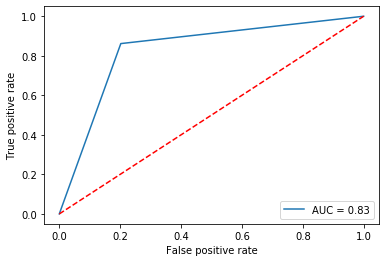

In [76]:
lr = LogisticRegression()
max_accuracy_score(lr,x,y)

# Decision Tree

max accuracy score corresponding to 59 is 91.66260360799609


cross validation score 77.67359050445104


Standard Deviation 2.3876750926924832


F1 score 92.5460636515913


Training accuracy 100.0


Test Accuracy 91.32130667966845


Confusion Matrix [[ 768   83]
 [  95 1105]]


Classification Report               precision    recall  f1-score   support

         0.0       0.89      0.90      0.90       851
         1.0       0.93      0.92      0.93      1200

    accuracy                           0.91      2051
   macro avg       0.91      0.91      0.91      2051
weighted avg       0.91      0.91      0.91      2051



Roc_auc Score 91.1650509204857





59

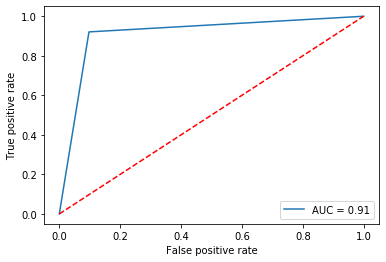

In [77]:
dt = DecisionTreeClassifier()
max_accuracy_score(dt,x,y)

# KNN

max accuracy score corresponding to 75 is 96.53827401267674


cross validation score 80.03560830860535


Standard Deviation 1.6076843533216638


F1 score 96.55451965950547


Training accuracy 98.13460131675201


Test Accuracy 95.85568015602145


Confusion Matrix [[ 775   76]
 [   9 1191]]


Classification Report               precision    recall  f1-score   support

         0.0       0.99      0.91      0.95       851
         1.0       0.94      0.99      0.97      1200

    accuracy                           0.96      2051
   macro avg       0.96      0.95      0.96      2051
weighted avg       0.96      0.96      0.96      2051



Roc_auc Score 95.1596650998825





75

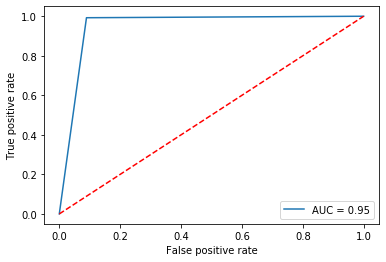

In [78]:
knn = KNeighborsClassifier()
max_accuracy_score(knn,x,y)

# Naive Bayes

max accuracy score corresponding to 87 is 80.59483178937103


cross validation score 77.50741839762611


Standard Deviation 4.698707881204184


F1 score 80.73716542343134


Training accuracy 78.99292855401121


Test Accuracy 78.59580692345197


Confusion Matrix [[692 159]
 [280 920]]


Classification Report               precision    recall  f1-score   support

         0.0       0.71      0.81      0.76       851
         1.0       0.85      0.77      0.81      1200

    accuracy                           0.79      2051
   macro avg       0.78      0.79      0.78      2051
weighted avg       0.79      0.79      0.79      2051



Roc_auc Score 78.99138268703487





87

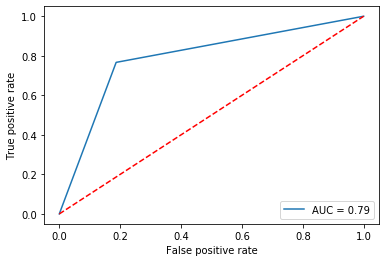

In [79]:
gnb = GaussianNB()
max_accuracy_score(gnb,x,y)

# Random Forest

max accuracy score corresponding to 43 is 96.97708434909799


cross validation score 85.0445103857567


Standard Deviation 1.553309721434387


F1 score 96.51162790697674


Training accuracy 100.0


Test Accuracy 95.90443686006826


Confusion Matrix [[ 805   46]
 [  38 1162]]


Classification Report               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       851
         1.0       0.96      0.97      0.97      1200

    accuracy                           0.96      2051
   macro avg       0.96      0.96      0.96      2051
weighted avg       0.96      0.96      0.96      2051



Roc_auc Score 95.71396396396396





43

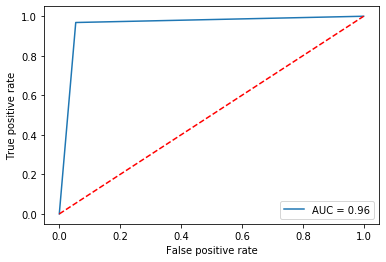

In [80]:
rf = RandomForestClassifier()
max_accuracy_score(rf,x,y)

# Ada Boost

max accuracy score corresponding to 84 is 87.95709410043881


cross validation score 81.3412462908012


Standard Deviation 2.599000008861119


F1 score 87.21174004192873


Training accuracy 86.5764447695684


Test Accuracy 85.12920526572404


Confusion Matrix [[ 706  145]
 [ 160 1040]]


Classification Report               precision    recall  f1-score   support

         0.0       0.82      0.83      0.82       851
         1.0       0.88      0.87      0.87      1200

    accuracy                           0.85      2051
   macro avg       0.85      0.85      0.85      2051
weighted avg       0.85      0.85      0.85      2051



Roc_auc Score 84.81394437916178





84

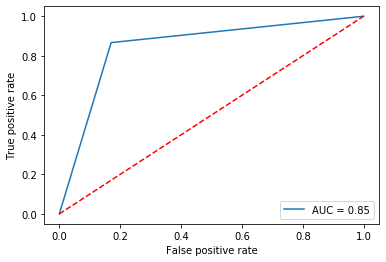

In [81]:
adb = AdaBoostClassifier()
max_accuracy_score(adb,x,y)

# Gradient Boost

max accuracy score corresponding to 56 is 91.22379327157483


cross validation score 81.54302670623146


Standard Deviation 3.1674719715394066


F1 score 91.44274493592393


Training accuracy 91.8190685198732


Test Accuracy 89.90736226231107


Confusion Matrix [[ 738  113]
 [  94 1106]]


Classification Report               precision    recall  f1-score   support

         0.0       0.89      0.87      0.88       851
         1.0       0.91      0.92      0.91      1200

    accuracy                           0.90      2051
   macro avg       0.90      0.89      0.90      2051
weighted avg       0.90      0.90      0.90      2051



Roc_auc Score 89.44408538973757





56

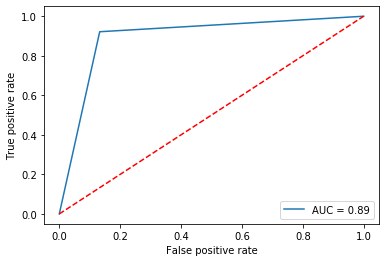

In [82]:
gb = GradientBoostingClassifier()
max_accuracy_score(gb,x,y)

## Let's check ROC_AUC curve for fitted models:

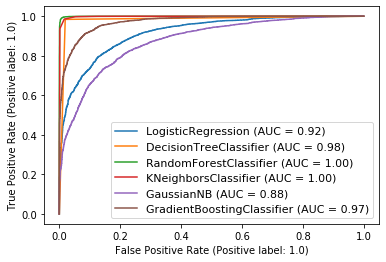

In [83]:
disp = plot_roc_curve(lr,x_resample,y_resample)
plot_roc_curve(dt,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(rf,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(knn,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(gnb,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(gb,x_resample,y_resample,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show();

The AUC curve of KNN and Random Forest Classifier has covered 100% area under the curve.

the accuracy score of random forest classifier is almost 96.97 and as the difference of Accuracy Score and CV of Random Forest Classifier is very less but not least. But we are going to do hyperparameter tuning of RFC because the False positive number is the least for rfc. Hence, it's the best Model. Let's do Hyperparameter Tuning of RFC.

# Hyperparameter Tuning

In [84]:
X_resampled, y_resampled = sm.fit_resample(x,y)
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,random_state=78,test_size=.20,stratify=y_resampled)

grid_param={'n_estimators':[12,13,15,17],
       'criterion':['entropy','gini'],
       'max_depth':[10,13,15,17],
       'min_samples_split':[10,12,11,13],
       'min_samples_leaf':[4,5,6,8]}

grid = GridSearchCV(rf,param_grid = grid_param)
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 17,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 17}

In [85]:
rf_fin_clf =RandomForestClassifier(criterion='entropy',max_depth=17,min_samples_leaf=4,min_samples_split=10,n_estimators=17)
rf_fin_clf.fit(x_train,y_train)
pred=rf_fin_clf.predict(x_train)
rf_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")
      
#####################TestScore##########################   
      
pred=rf_fin_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n=======================Test Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")      
      


=======================Train Result===========================
Accuracy score:98.65%
_______________________________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.987643     0.985691  0.986498     0.986667      0.986504
recall        0.979860     0.991241  0.986498     0.985550      0.986498
f1-score      0.983736     0.988458  0.986498     0.986097      0.986490
support    3426.000000  4795.000000  0.986498  8221.000000   8221.000000
________________________________________________________________
 Confusion Matrix:
[[3357   69]
 [  42 4753]]


=======================Test Result===========================
Accuracy score:93.19%
_______________________________________________________________
CLASSIFICATION REPORT:
                  0.0          1.0  accuracy    macro avg  weighted avg
precision    0.935601     0.929440  0.931907     0.932521      0.932009
recall       0.898483     0.955796

### checking classification report

In [86]:
Report = classification_report(y_test,pred)
print(Report)

              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92       857
         1.0       0.93      0.96      0.94      1199

    accuracy                           0.93      2056
   macro avg       0.93      0.93      0.93      2056
weighted avg       0.93      0.93      0.93      2056



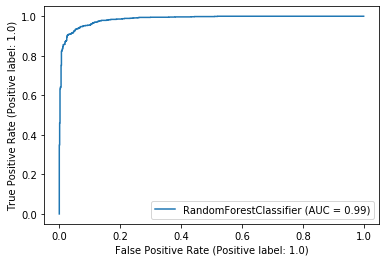

In [87]:
disp = plot_roc_curve(rf_fin_clf,x_test,y_test)

### Obs: Final AUC = 0.99 , great!

# Concusion

In [88]:
x_predict = list (rf_fin_clf.predict(x_test))
rf_clf_insu = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(rf_clf_insu))

      predicted_values  orignal_values
5948               1.0             1.0
8069               1.0             1.0
7917               1.0             1.0
5399               1.0             1.0
4796               1.0             1.0
...                ...             ...
4156               0.0             0.0
7615               1.0             1.0
8749               1.0             1.0
1567               1.0             0.0
6247               1.0             1.0

[2056 rows x 2 columns]


# Saving Model

In [89]:
import joblib
joblib.dump(rf_fin_clf,"rand_clf_rainfall.pkl")

['rand_clf_rainfall.pkl']

# Loading model

In [90]:
rf_from_joblib = joblib.load('rand_clf_rainfall.pkl')
rf_from_joblib.predict(x_test)

array([1., 1., 1., ..., 1., 1., 1.])